# COMP 10020 Introduction to Programming 2
## Assignment 2 - Movie Moneyball

The rise of popularrity of **data science** has led to data science techniques being applied in some unexpected places, and to the release of some very interesting datasets. There are very few areas in which data science techiques are not making a difference.

One area where data is driving decision making is the movie business. Data is being used to undrstand the pefromance of movies and even make decisions about what movies to make. The goal of this assignment is to use data about movie releases from 1916 to 2017 to answer a series of questions. 

### Import Useful Packages

In [2]:
# Import useful packages for data science
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline  

### Question 1: Import Data

Details of a large collecrtion of movies released between 1916 and 2017 are contained in the file **movies.csv** and **casts.csv**. Each row within **movies.csv** describes a movie, using the following fields:

* **id**: A nunique ID of the movie
* **title**: The title of the movie
* **tagline**: The tagline for the movie
* **homepage**: A URL for the homepage of the movive (may no longer exist)
* **release_date**: The release date of teh movei as yyyy/mm/dd
* **genre**: A category indicating the main genre of the movie
* **budget**: The budget of rthe movie in US dollars
* **keywords**: A list of keywords sdecribing the movie
* **original_language** The orginal labguage of the movie (as a two letter abbreviation, e.g. en for English)
* **revenue**: The revnue earned by the movie in US dollars
* **runtime**: The runtime of the movie in minutes
* **status**: The status of the movie (one of *Released*, *Rumored*, or *Post Production*)
* **vote_average**: The average rating for the movie (from 0 to 10)
* **vote_count**: The number of ratings that have been provided for the movie
* **director**: The director of the movie
       
Each row within **casts.csv** contains the id of a movie and the name of an actor in that move. This file uses the following fields:

* **id**: The id of the movie
* **billing**: The billing of the actor (one of *cast_0*, *cast_1*, *cast_2*, or *cast_3*)
* **actor**: The name of the actor

Load the two datasets (**movies.csv** and **casts.csv**) into pandas data frames: **movies** and **casts**. Display the first five rows from each.

In [3]:
movies = pd.read_csv('movies.csv')
casts = pd.read_csv('casts.csv')

### Question 2: Tidy

Define a function to convert dates into years.

In [4]:
def date_to_year(d):
    if(type(d) != str):
        return np.NaN
    else:
        date_parts = d.split('-')
        year = date_parts[0]
        return int(year)

Convert dates into years for each movie to add a new column **release_year**. The pandas Series **apply** function used togehter with the **date_to_year** function defined above can be used for this.

In [84]:
movies['release_year'] = movies["release_date"].apply(date_to_year)
movies.tail()

,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director,release_year,release_month
4386,124606,Bang,Sometimes you've got to break the rules,NaN,1995-09-09,Drama,0,gang audition police fake homeless actress,en,0,98.0,Released,6.0,1,Ash Baron-Cohen,1995,9
4387,14337,Primer,What happens if it actually works?,http://www.primermovie.com,2004-10-08,Science,7000,distrust garage identity crisis time travel ti...,en,424760,77.0,Released,6.9,658,Shane Carruth,2004,10
4388,9367,El Mariachi,"He didn't come looking for trouble, but troubl...",NaN,1992-09-04,Action,220000,united states\u2013mexico barrier legs arms pa...,es,2040920,81.0,Released,6.6,238,Robert Rodriguez,1992,9
4389,231617,"Signed, Sealed, Delivered",NaN,http://www.hallmarkchannel.com/signedsealeddel...,2013-10-13,Comedy,0,date love at first sight narration investigati...,en,0,120.0,Released,7.0,6,Scott Smith,2013,10
4390,25975,My Date with Drew,NaN,NaN,2005-08-05,Documentary,0,obsession camcorder crush dream girl,en,0,90.0,Released,6.3,16,Brian Herzlinger,2005,8


Define a function to convert dates into months.

In [8]:
def date_to_month(d):
    if(type(d) != str):
        return np.NaN
    else:
        date_parts = d.split('-')
        month = date_parts[1]
        return int(month)

Convert dates into months for each movie to add a new column **release_month**. The pandas Series **apply** function used togehter with the **date_to_month** function defined above can be used for this.

In [83]:
movies['release_month'] = movies["release_date"].apply(date_to_month)
movies.tail()

,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director,release_year,release_month
4386,124606,Bang,Sometimes you've got to break the rules,NaN,1995-09-09,Drama,0,gang audition police fake homeless actress,en,0,98.0,Released,6.0,1,Ash Baron-Cohen,1995,9
4387,14337,Primer,What happens if it actually works?,http://www.primermovie.com,2004-10-08,Science,7000,distrust garage identity crisis time travel ti...,en,424760,77.0,Released,6.9,658,Shane Carruth,2004,10
4388,9367,El Mariachi,"He didn't come looking for trouble, but troubl...",NaN,1992-09-04,Action,220000,united states\u2013mexico barrier legs arms pa...,es,2040920,81.0,Released,6.6,238,Robert Rodriguez,1992,9
4389,231617,"Signed, Sealed, Delivered",NaN,http://www.hallmarkchannel.com/signedsealeddel...,2013-10-13,Comedy,0,date love at first sight narration investigati...,en,0,120.0,Released,7.0,6,Scott Smith,2013,10
4390,25975,My Date with Drew,NaN,NaN,2005-08-05,Documentary,0,obsession camcorder crush dream girl,en,0,90.0,Released,6.3,16,Brian Herzlinger,2005,8


### Question 2: Simple Analysis

Use simple data analysis to answer the following questions. 

**a)** In how many genres have movies been released?

In [13]:
genres = len(movies['genre'].value_counts())
print('Movies have been released in',genres, 'genres.')

Movies have been released in 20 genres.


**b)** Generate and print a table showing many times movies have been released in each *genre*?

In [18]:
table =  pd.DataFrame(movies['genre'].value_counts())
table.columns = ['Number of Movies']
table

,Number of Movies
Drama,1100
Comedy,950
Action,702
Adventure,327
Horror,278
Crime,184
Thriller,170
Fantasy,112
Animation,111
Romance,98


**c)** How many movies have been released under the *Comedy* genre?

In [20]:
print('Number of movies released in Comedy genre: ', table.loc['Comedy'].values)

Number of movies released in Comedy genre:  [950]


**d)** In which month are movies most frequently relased?

In [34]:
print('Most Frequently, Movies Released in ', movies['release_month'].value_counts().index[0], 'month')

Most Frequently, Movies Released in  9 month


**e)** Who are the ten most prolific *directors* in the dataset?

In [42]:
print('The ten most prolific directors in the dataset:')
movies['director'].value_counts().iloc[0:10]

The ten most prolific directors in the dataset:


Steven Spielberg     27
Woody Allen          20
Martin Scorsese      20
Clint Eastwood       19
Ridley Scott         16
Steven Soderbergh    15
Robert Rodriguez     15
Renny Harlin         15
Oliver Stone         14
Tim Burton           14
Name: director, dtype: int64

### Question 3: Deeper Analysis

Use slightly more advanced data analysis to answer the following questions.

**a)** Draw an appropriate data visualsiation that shows the number of movies released each year?

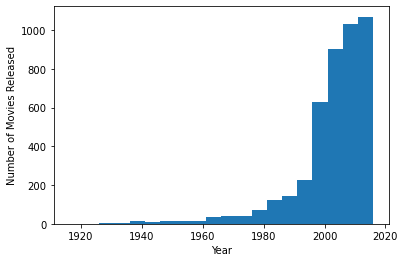

In [60]:
x = movies['release_year']
n_bins = 20
plt.hist(x, n_bins, density = False, histtype ='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

**b)** What is the average duration of a movie (in minutes)?

In [63]:
print('The average duration of a movie (in minutes): ', movies['runtime'].mean())

The average duration of a movie (in minutes):  108.11642743221691


**c)** How many times has there been a movie described with the keyword *spy*?

**Hint:** Experiment with the *str.contains* method from *pandas.Series*.

In [66]:
print('Movies described with the keyword spy: ', movies['keywords'].str.contains('spy').sum(), 'times')

Movies described with the keyword spy:  41 times


**d)** Which actor has starred in the most movies in the datset? 

In [131]:
temp = movies.set_index('id').join(casts.set_index('id')).sort_values(by='vote_average')
print('Starred Actor in the most movies in the datset: ', temp.groupby(['actor']).mean().sort_values(by="vote_average").index[0])
temp.groupby(['actor']).mean().iloc[0]

Starred Actor in the most movies in the datset:  Michael Derek


budget           5000000.0
revenue                0.0
runtime              107.0
vote_average           7.0
vote_count           202.0
release_year        2011.0
release_month         10.0
Name:  Alberto, dtype: float64

**e)** Are movies by *Woody Allen*  longer, on average, than movies by *Martin Scorsese*?

**Bonus:** Can you plot a data visualisation to support this conclusion?

In [117]:
woody = temp.groupby(['actor']).mean().loc['Woody Allen','runtime']
martin = temp.groupby(['actor']).mean().loc['Martin Freeman','runtime'] # there is no actor named Martin Scorses in dataset
print("Average Runtime of Woody Allen's Movies: ", woody)
print("Average Runtime of Martin Freeman's Movies: ",martin)
print('Are movies by Woody Allen longer, on average, than movies by Martin Scorsese?')
if martin > woody:
    print('NO')
else:
    print('Yes')

Average Runtime of Woody Allen's Movies:  97.78571428571429
Average Runtime of Martin Freeman's Movies:  127.28571428571429
Are movies by Woody Allen longer, on average, than movies by Martin Scorsese?
NO


### Question 4: Merging Data

Answer questions that require merging the **movies** and **casts** datsets.

**a)** Which actor starred in the most movies in the year 2010?

In [122]:
# Write code here
merged = movies.merge(casts)
merged = merged[merged['release_year'] == 2010].sort_values(by="vote_average")
merged.tail(4)

,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director,release_year,release_month,billing,actor
378,27205,Inception,Your mind is the scene of the crime.,http://inceptionmovie.warnerbros.com/,2010-07-14,Action,160000000,loss of lover dream kidnapping sleep subconsci...,en,825532764,148.0,Released,8.1,13752,Christopher Nolan,2010,7,cast_2,Ellen Page
377,27205,Inception,Your mind is the scene of the crime.,http://inceptionmovie.warnerbros.com/,2010-07-14,Action,160000000,loss of lover dream kidnapping sleep subconsci...,en,825532764,148.0,Released,8.1,13752,Christopher Nolan,2010,7,cast_1,Joseph Gordon-Levitt
376,27205,Inception,Your mind is the scene of the crime.,http://inceptionmovie.warnerbros.com/,2010-07-14,Action,160000000,loss of lover dream kidnapping sleep subconsci...,en,825532764,148.0,Released,8.1,13752,Christopher Nolan,2010,7,cast_0,Leonardo DiCaprio
379,27205,Inception,Your mind is the scene of the crime.,http://inceptionmovie.warnerbros.com/,2010-07-14,Action,160000000,loss of lover dream kidnapping sleep subconsci...,en,825532764,148.0,Released,8.1,13752,Christopher Nolan,2010,7,cast_3,Tom Hardy


**b)** Which actor's movies have the highest total revenue in the dataset?

In [130]:
merged = movies.merge(casts)
merged.groupby(['actor']).mean().sort_values(by="revenue").iloc[-1, :]

id               2.442800e+04
budget           2.200000e+08
revenue          1.519558e+09
runtime          1.430000e+02
vote_average     7.400000e+00
vote_count       1.177600e+04
release_year     2.012000e+03
release_month    4.000000e+00
Name: Evans Mark, dtype: float64